In [ ]:
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/Pós Live/MIT de Inteligencia Artificial e Machine Learning/202204 - Processamento de linguagem natural com Python/notebooks/data/movie-pang02.csv")

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(data.text.tolist())

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split


In [ ]:
data['class'] = data['class'].apply(lambda s: int(s=='Pos'))
data

,class,text
0,1,films adapted from comic books have had plent...
1,1,every now and then a movie comes along from a...
2,1,you ve got mail works alot better than it des...
3,1,jaws is a rare film that grabs your atte...
4,1,moviemaking is a lot like being the general m...
...,...,...
1995,0,if anything stigmata should be taken as...
1996,0,john boorman s zardoz is a goofy cinemati...
1997,0,the kids in the hall are an acquired taste ...
1998,0,there was a time when john carpenter was a gr...


In [ ]:
input = X.toarray()
target = data['class'].values

In [ ]:
X, X_test, y, y_test = train_test_split(input, target, test_size=0.20, random_state=42)


In [ ]:
model = MultinomialNB()
model.fit(X, y)

MultinomialNB()

In [ ]:
model.score(X_test, y_test)


0.7975

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80       201
           1       0.80      0.78      0.79       199

    accuracy                           0.80       400
   macro avg       0.80      0.80      0.80       400
weighted avg       0.80      0.80      0.80       400



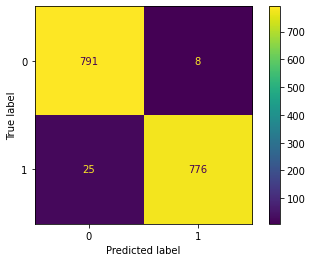

In [ ]:
%matplotlib inline

from sklearn.metrics import ConfusionMatrixDisplay

import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_estimator(model, X, y)

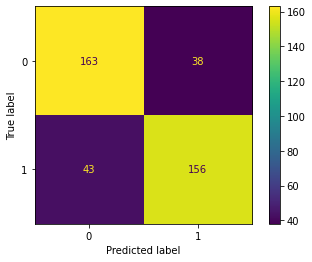

In [ ]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)